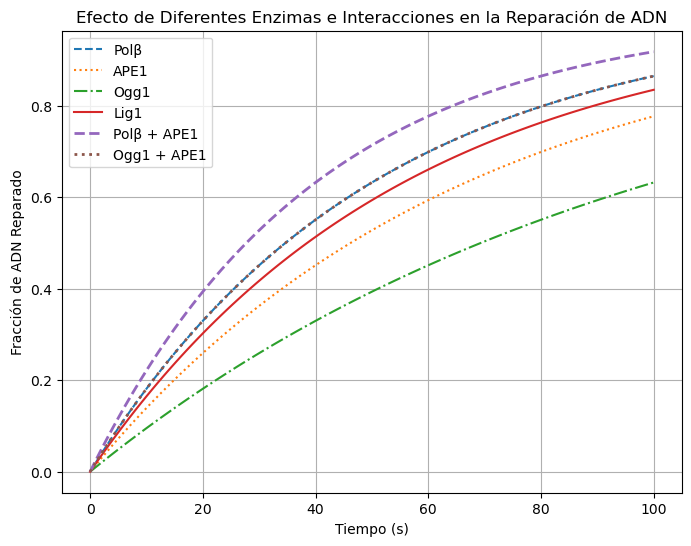

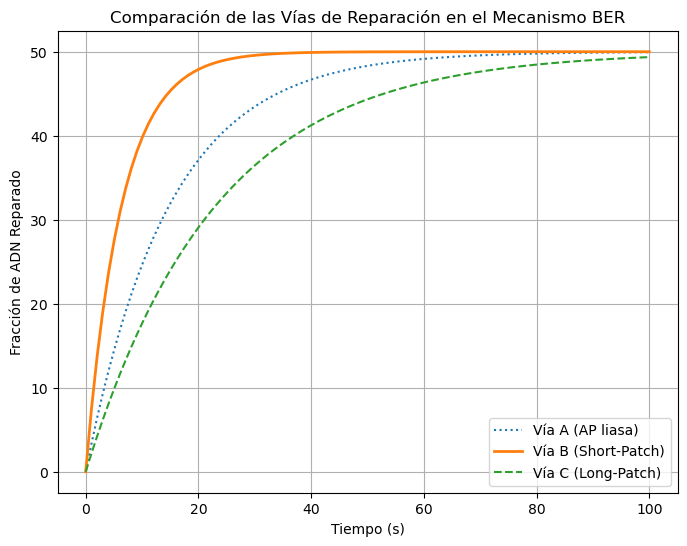

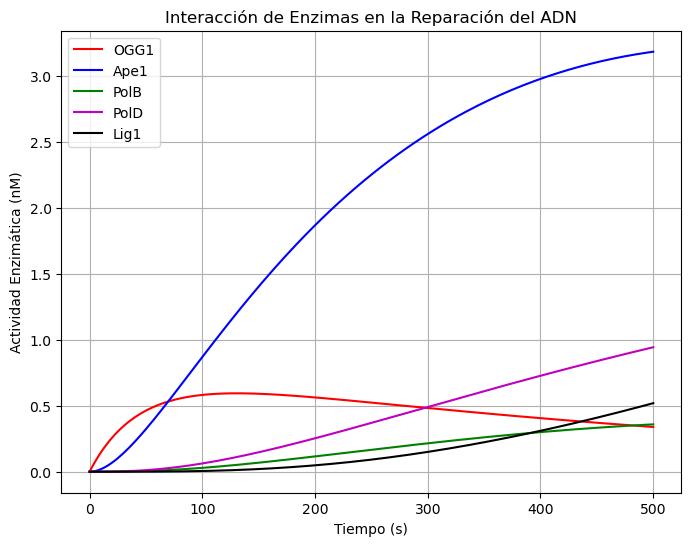

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el tiempo en segundos
tiempo = np.linspace(0, 100, 100)

# Definir las funciones de reparación para diferentes enzimas
pol_beta = 1 - np.exp(-0.02 * tiempo)  # Polβ
ape1 = 1 - np.exp(-0.015 * tiempo)  # APE1
ogg1 = 1 - np.exp(-0.01 * tiempo)  # Ogg1
lig1 = 1 - np.exp(-0.018 * tiempo)  # Lig1

# Interacciones entre enzimas
pol_beta_ape1 = 1 - np.exp(-0.025 * tiempo)  # Cooperación Polβ + APE1
ogg1_ape1 = 1 - np.exp(-0.02 * tiempo)  # Cooperación Ogg1 + APE1

# Primera gráfica: Efecto de diferentes enzimas e interacciones
plt.figure(figsize=(8,6))
plt.plot(tiempo, pol_beta, '--', label='Polβ')
plt.plot(tiempo, ape1, ':', label='APE1')
plt.plot(tiempo, ogg1, '-.', label='Ogg1')
plt.plot(tiempo, lig1, '-', label='Lig1')
plt.plot(tiempo, pol_beta_ape1, '--', linewidth=2, label='Polβ + APE1')
plt.plot(tiempo, ogg1_ape1, ':', linewidth=2, label='Ogg1 + APE1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Fracción de ADN Reparado')
plt.title('Efecto de Diferentes Enzimas e Interacciones en la Reparación de ADN')
plt.legend()
plt.grid()
plt.show()

# Definir las funciones de reparación para diferentes vías del BER
via_A = 1 - np.exp(-0.00139*48.8 * tiempo)  # Vía A (AP liasa)
via_B = 1 - np.exp(-0.008*19.8 * tiempo)  # Vía B (Short-Patch)
via_C = 1 - np.exp(-0.0022*19.8 * tiempo)  # Vía C (Long-Patch)

# Segunda gráfica: Comparación de las vías de reparación en el mecanismo BER
plt.figure(figsize=(8,6))
plt.plot(tiempo, via_A*50, ':', label='Vía A (AP liasa)')
plt.plot(tiempo, via_B*50, '-', linewidth=2, label='Vía B (Short-Patch)')
plt.plot(tiempo, via_C*50, '--', label='Vía C (Long-Patch)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Fracción de ADN Reparado')
plt.title('Comparación de las Vías de Reparación en el Mecanismo BER')
plt.legend()
plt.grid()
plt.show()

# Simulación de reparación del ADN considerando la interacción entre enzimas
# Definición de parámetros cinéticos
k_OGG1 = 0.02
K_OGG1 = 500
k_Ape1 = 0.01
K_Ape1 = 50
k_PolB = 0.008
K_PolB = 200
k_PolD = 0.005
K_PolD = 60
k_Lig1 = 0.004
K_Lig1 = 100

# Concentraciones iniciales
enzyme_OGG1 = 50
enzyme_Ape1 = 130
enzyme_PolB = 25
enzyme_PolD = 25
enzyme_Lig1 = 50

# Daño inicial en el ADN
damage_0 = 100

# Definir ecuaciones diferenciales
def enzyme_interaction(y, t):
    damage, OGG1_activity, Ape1_activity, PolB_activity, PolD_activity, Lig1_activity = y
    
    v_OGG1 = (k_OGG1 * enzyme_OGG1 * damage) / (damage + K_OGG1 + 1e-6)
    v_Ape1 = (k_Ape1 * enzyme_Ape1 * OGG1_activity) / (OGG1_activity + K_Ape1 + 1e-6)
    v_PolB = (k_PolB * enzyme_PolB * Ape1_activity) / (Ape1_activity + K_PolB + 1e-6)
    v_PolD = (k_PolD * enzyme_PolD * Ape1_activity) / (Ape1_activity + K_PolD + 1e-6)
    v_Lig1 = (k_Lig1 * enzyme_Lig1 * (PolB_activity + PolD_activity)) / ((PolB_activity + PolD_activity) + K_Lig1 + 1e-6)
    
    return [-v_OGG1, v_OGG1 - v_Ape1, v_Ape1 - (v_PolB + v_PolD), v_PolB - v_Lig1, v_PolD - v_Lig1, v_Lig1]

# Tiempo de simulación
tspan = np.linspace(0, 500, 200)

# Resolver ecuación diferencial
y0 = [damage_0, 0, 0, 0, 0, 0]
y = odeint(enzyme_interaction, y0, tspan)

# Graficar resultados
plt.figure(figsize=(8,6))
plt.plot(tspan, y[:,1]/10, 'r', label='OGG1')
plt.plot(tspan, y[:,2]/10, 'b', label='Ape1')
plt.plot(tspan, y[:,3]/10, 'g', label='PolB')
plt.plot(tspan, y[:,4]/10, 'm', label='PolD')
plt.plot(tspan, y[:,5]/10, 'k', label='Lig1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Actividad Enzimática (nM)')
plt.legend()
plt.title('Interacción de Enzimas en la Reparación del ADN')
plt.grid()
plt.show()
